In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retriving an array of files in directories
from tensorflow.keras.models import Sequential #for neural network models
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from tensorflow.keras.utils import to_categorical #For One-hot Encoding
from tensorflow.keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 다운받은후 아래의 pre_path 수정
- url https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [26]:
### 자신의 디렉토리에 맞게 수정 
pre_path = "/Users/agun/school/chest_xray/chest_xray"
path_train = pre_path + "/train"
path_val = pre_path + "/val"
path_test = pre_path + "/test"

In [3]:
img = glob(path_train+"/PNEUMONIA/*.jpeg")

In [5]:
len(img)

3875

In [6]:
img = np.asarray(plt.imread(img[0]))

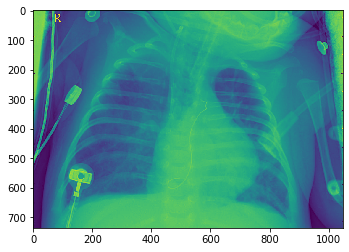

In [7]:
plt.imshow(img)

In [8]:
img.shape

(736, 1048)

In [9]:
img = glob(path_train+"/NORMAL/*.jpeg")

In [10]:
len(img)

1341

In [11]:
img = np.asarray(plt.imread(img[0]))

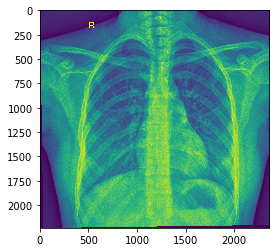

In [12]:
plt.imshow(img)

In [13]:
img.shape

(2234, 2359)

In [14]:
classes = ["NORMAL", "PNEUMONIA"]
train_data = glob(path_train+"/NORMAL/*.jpeg")
train_data += glob(path_train+"/PNEUMONIA/*.jpeg")
data_gen = ImageDataGenerator() #Augmentation happens here
#But in this example we're not going to give the ImageDataGenerator method any parameters to augment our data.

In [15]:
train_batches = data_gen.flow_from_directory(path_train, target_size = (226, 226), classes = classes, class_mode = "categorical")
val_batches = data_gen.flow_from_directory(path_val, target_size = (226, 226), classes = classes, class_mode = "categorical")
test_batches = data_gen.flow_from_directory(path_test, target_size = (226, 226), classes = classes, class_mode = "categorical")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [16]:
train_batches.image_shape

(226, 226, 3)

In [17]:
#This is a Convolutional Artificial Neural Network
#VGG16 Model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=train_batches.image_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [18]:
#Viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 228, 228, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 226, 226, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 228, 228, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 226, 226, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 115, 115, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 128)     7

In [20]:
optimizer = Adam(lr = 0.0001)
early_stopping_monitor = EarlyStopping(patience = 3, monitor = "val_acc", mode="max", verbose = 2)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
history = model.fit_generator(epochs=5, callbacks=[early_stopping_monitor], shuffle=True, validation_data=val_batches, generator=train_batches, steps_per_epoch=500, validation_steps=10,verbose=2)
prediction = model.predict_generator(generator=train_batches, verbose=2, steps=100)

Epoch 1/5
500/500 - 6744s - loss: 0.2117 - accuracy: 0.9125 - val_loss: 0.4120 - val_accuracy: 0.8125
Epoch 2/5
500/500 - 6986s - loss: 0.0658 - accuracy: 0.9759 - val_loss: 0.3580 - val_accuracy: 0.8750
Epoch 3/5
500/500 - 6943s - loss: 0.0427 - accuracy: 0.9852 - val_loss: 0.2101 - val_accuracy: 0.9375
Epoch 4/5
500/500 - 6930s - loss: 0.0321 - accuracy: 0.9883 - val_loss: 0.0770 - val_accuracy: 1.0000
Epoch 5/5
500/500 - 6794s - loss: 0.0213 - accuracy: 0.9927 - val_loss: 0.0190 - val_accuracy: 1.0000
100/100 - 391s


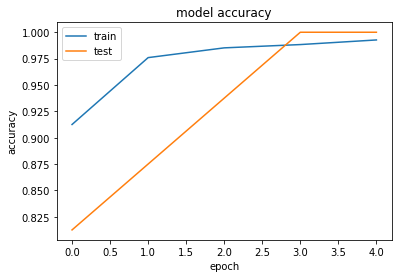

In [23]:
'''
Source: Jason Brownlee
Site: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
'''

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

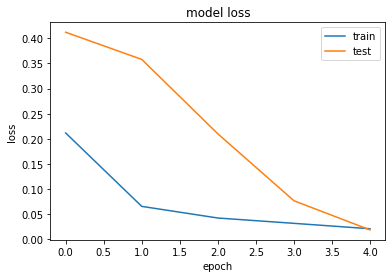

In [24]:
'''
Source: Jason Brownlee
Site: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
'''
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()